In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import json
%matplotlib notebook

In [3]:
with open('result.json') as file:
    data = json.load(file)

In [4]:
def ensure_num(x):
    x = x.replace(",", "")
    return float(x)

def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def plot(name, keys):
    plt.rcParams["figure.figsize"] = (10,6)
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.6)
    lines = []
    for i, k in enumerate(keys):
        if i == 0:
            ax = host
        else:
            ax = host.twinx()
            if i > 1:
                ax.spines["right"].set_position(("axes", 1 + (i-1)*0.3))
                make_patch_spines_invisible(ax)
                ax.spines["right"].set_visible(True)
        ax.set_ylabel(k)
        num = [ensure_num(n.split()[0]) for n in data[name][k]]
        p, = ax.plot(list(map(int, data[name]['n'])), num, color = colors[i], label=f'{k}')
        lines.append(p)
        ax.yaxis.label.set_color(p.get_color())
        if len(data[name][k][0].split()) > 1:
            formatter = EngFormatter(unit=f'{data[name][k][0].split()[1]}')
            ax.yaxis.set_major_formatter(formatter)
    host.set_xlabel('Host')
    host.legend(lines, [l.get_label() for l in lines])
    host.set_title('Multiple')
    fig.savefig(f"./multiple.png")
    plt.show()

In [5]:
data['weka_12nodes'].keys()

dict_keys(['n', 'iops_total_read_bandwidth', 'iops_avg_read_bandwidth', 'iops_total_bandwidth', 'iops_avg_bandwidth', 'iops_avg_write_bandwidth', 'iops_total_write_bandwidth', 'iops_total write iops', 'iops_total iops', 'iops_avg write iops', 'iops_total read iops', 'iops_avg read iops', 'iops_avg iops', 'bw_total_read_bandwidth', 'bw_avg_read_bandwidth', 'bw_total_bandwidth', 'bw_avg_bandwidth', 'bw_avg_write_bandwidth', 'bw_total_write_bandwidth', 'bw_total write iops', 'bw_total iops', 'bw_avg write iops', 'bw_total read iops', 'bw_avg read iops', 'bw_avg iops', 'latency_write latency', 'latency_read latency', 'detwrite_total_read_bandwidth', 'detwrite_avg_read_bandwidth', 'detwrite_total_bandwidth', 'detwrite_avg_bandwidth', 'detwrite_avg_write_bandwidth', 'detwrite_total_write_bandwidth', 'detwrite_total write iops', 'detwrite_total iops', 'detwrite_avg write iops', 'detwrite_total read iops', 'detwrite_avg read iops', 'detwrite_avg iops', 'detwrite_write latency', 'detwrite_read 

<IPython.core.display.Javascript object>


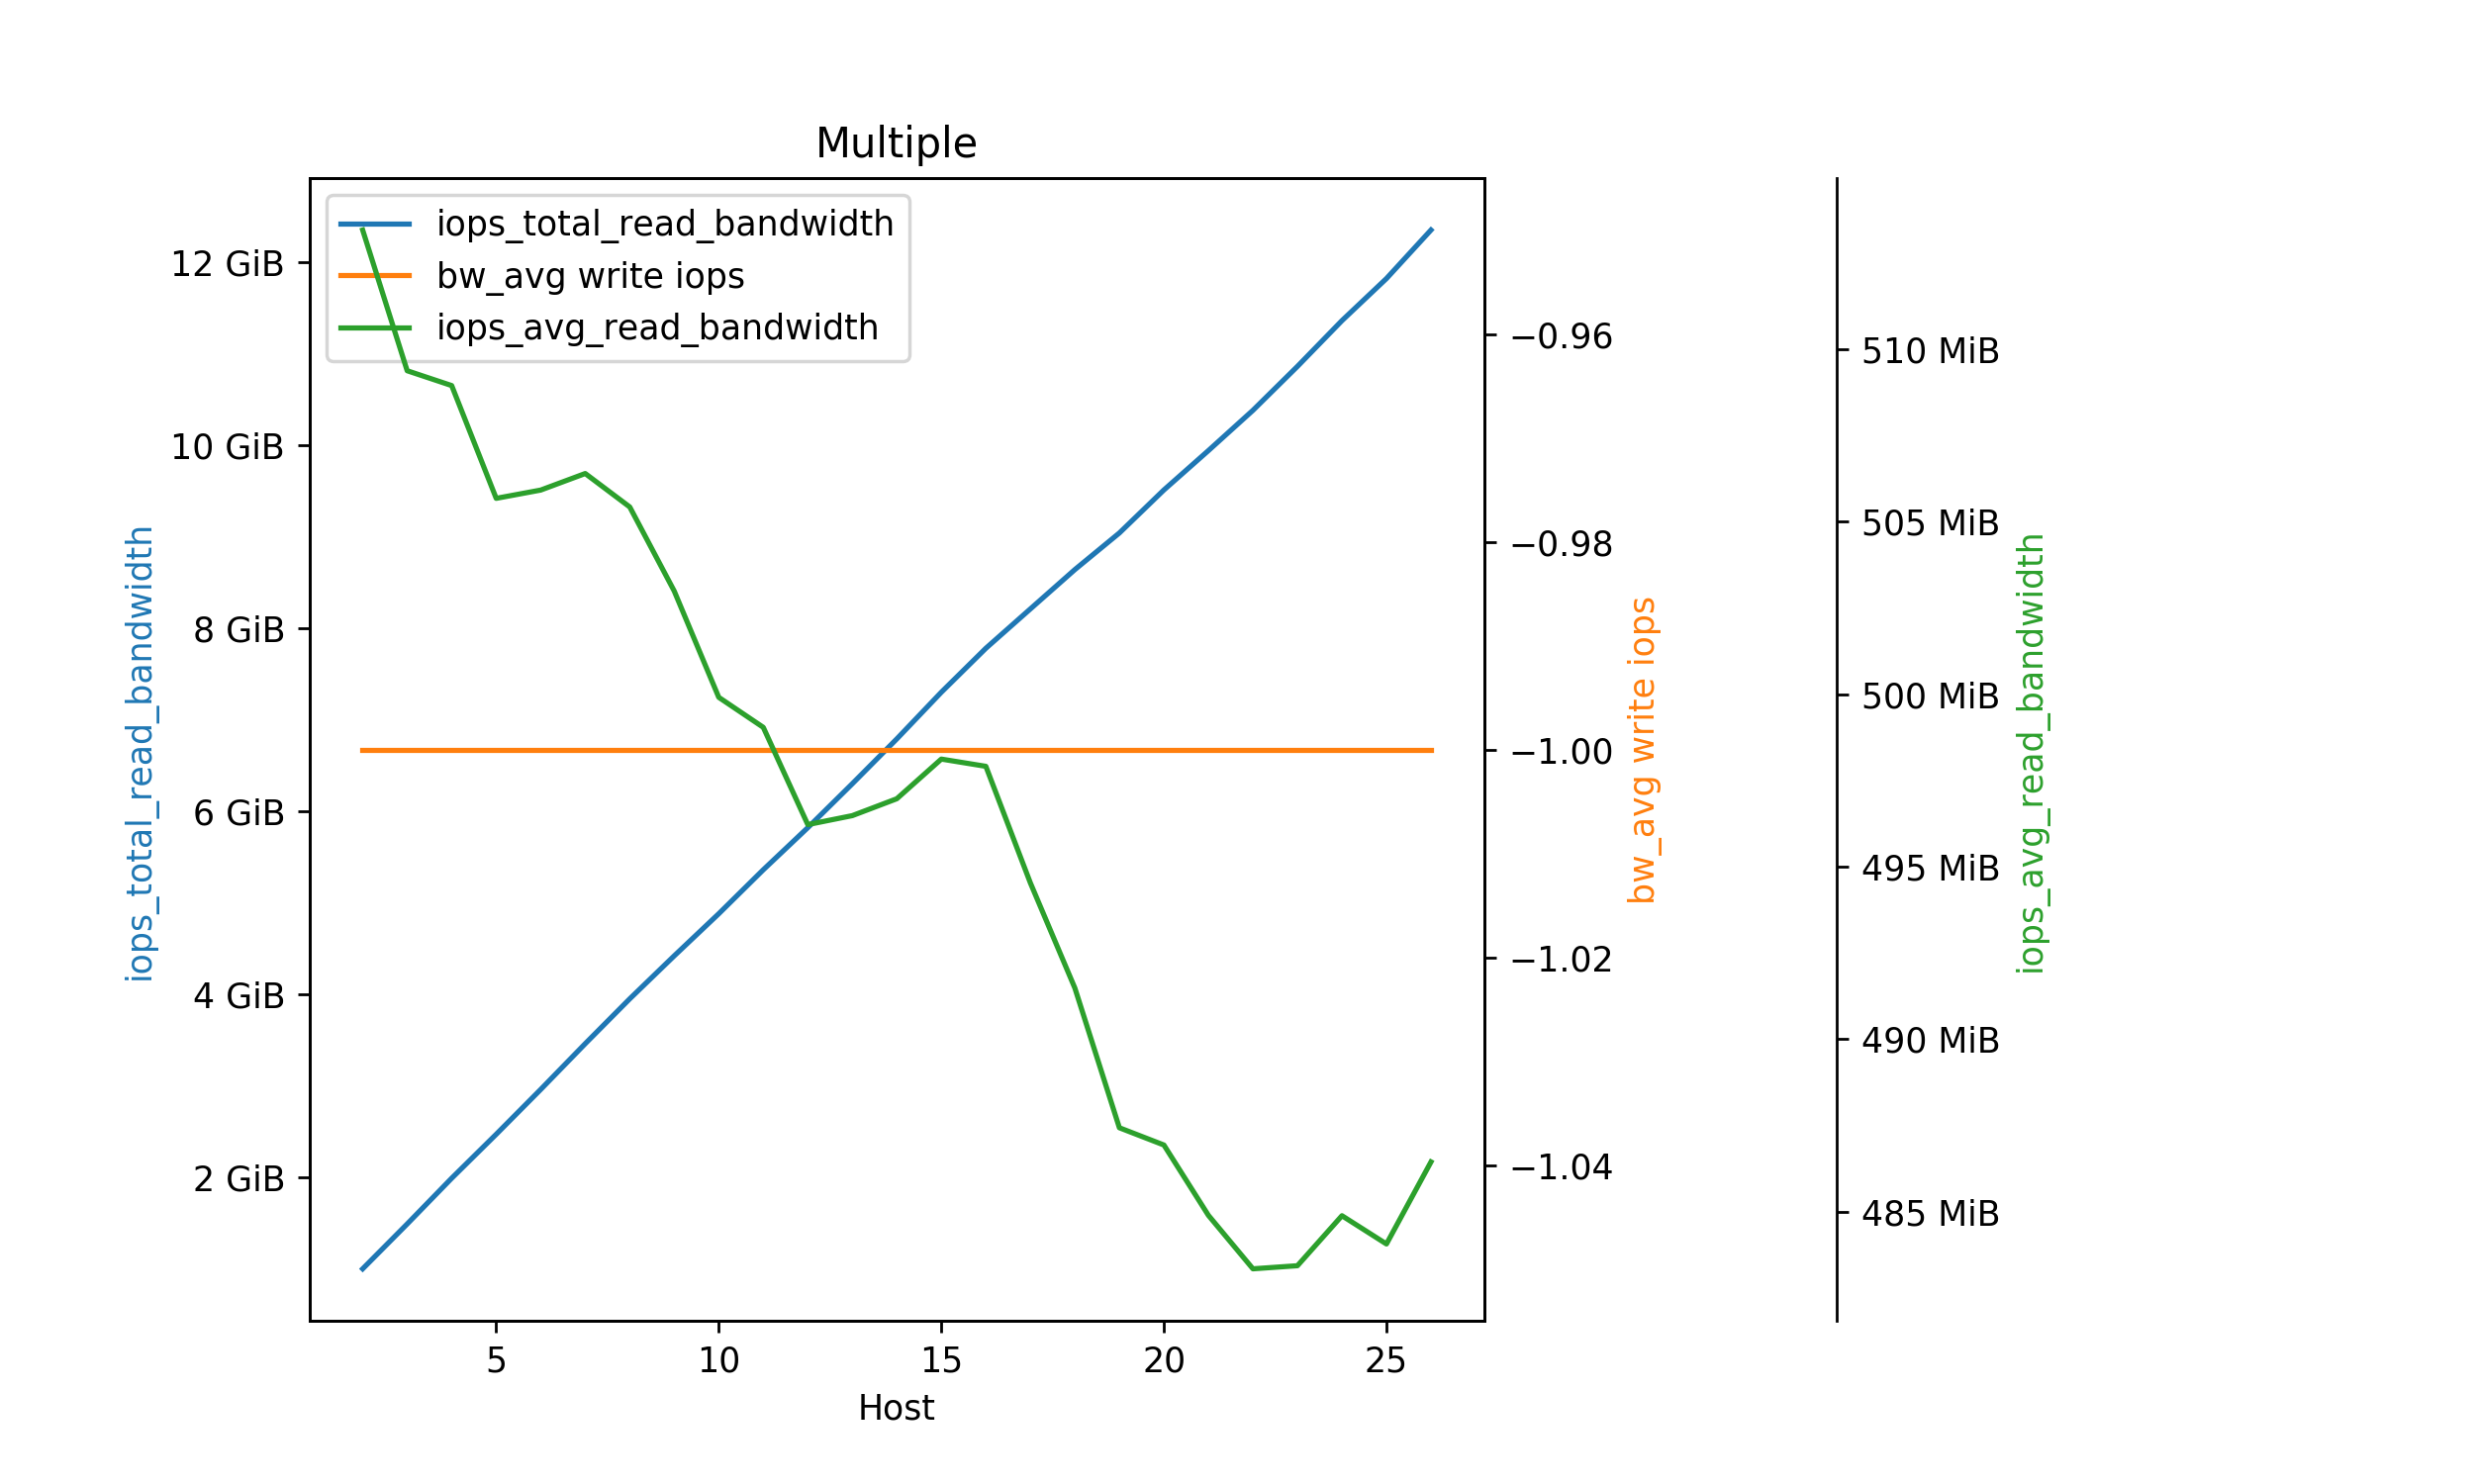

In [6]:
plot('weka_12nodes', ['iops_total_read_bandwidth','bw_avg write iops','iops_avg_read_bandwidth'])